# 	 The Chars74K dataset

# OCR

## Department of Electrical and Computer Engineering, University of Thessaly, Volos, Greece

## Project: IoT OCR Part5
---

In this project, we implement a solution about is the [Chars74k](http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/). Character recognition is a classic pattern recognition problem.The recognition is for latin letters and digits.
> **Note**: 62 classes (0-9, A-Z, a-z)



---

## Introduction 
<img src="download.png"> 


- **STEP 1** is a pre-processing step where we prepareoy data to be fed in the NN.

- **STEP 2** is the Encoder step that takes the picture and converts it into D-dimensional tensor with L-Features with a CNN.This also cold feature extraction step because it detects patterns to help the detection process.
- **STEP 3** is the decoder which accepts the Encoder output as input and returns a probability distribution over all the classes with a  DNN(deep neural network) .

## The Data
The Chars74k dataset consists of:

- Image size: 64x64 or 128X128
- 7705 characters obtained from natural images
- 3410 hand drawn characters using a tablet PC
- 62992 synthesised characters from computer font


## Requirements
- python3
- Tansorflow 1.12 gpu
- opencv
- At least 8GB RAM
- At least 3GB GPU RAM







## Example!
<img src="unnamed.png"> 

In [2]:
proj_directory = '/Users/Theologis/Desktop/CAS Lab/sem-supervised_chars74k/' ##TOCHANGE... cd in the ${../../sem-supervised_chars74k}/ dir
%cd $proj_directory
real_size = (32,32,1)
import tensorflow as tf 


C:\Users\Theologis\Desktop\CAS Lab\sem-supervised_chars74k


## STEP 1 
  At this step we load every image. We also  randomly shuffle data to train,validate and test sets and then plot a radom image for visualisation  purposes .The output of the NN should be a one hot encoded vector.This vector must have 1 in the right class and 0 the other 62 classes.
### Improving performance
The dataset is quite small (less than 10K images). Data augmentation along with a  [GAN](https://www.tensorflow.org/tutorials/generative/dcgan) model help as increase our model's accuracy from 70%  to $88 $% .The GAN model also add the 63th class witch gives as the probability that the image is latter in the 62 classes. 
#### Data augmentation Steps
- Random rotations between -10 and 10 degrees.
- Random translation between -10 and 10 pixels in any direction.
- Random zoom between factors of 1 and 1.3.
- Gray scale.

In [2]:
from data_gen import load_data
train_x = load_data(_,proj_directory=proj_directory,real_size=real_size)



100%|█████████████████████████████████████████████████████████████████████████████| 6185/6185 [00:02<00:00, 2890.03i/s]


11487 data successfully loades with shape :  (32, 32, 1)
Saving Test Data in the 'test_data' folder...


# Last steps (Our model)
In semi-supervised learning, our goal is still to train a model that takes $x$ as input and generates $y$ as output. However, not all of our training examples have a label $y$. We need to develop an algorithm that is able to get better at classification by studying both labeled $(x, y)$ pairs and unlabeled $x$ examples.

To do this for the Chars74K dataset, we'll turn the GAN discriminator into an 62 class discriminator. It will recognize the 10 different classes of real Chars74K, as well as an 63th class of fake images that come from the generator. The discriminator will get to train on real labeled images, real unlabeled images, and fake images. By drawing on three sources of data instead of just one, it will generalize to the test set much better than a traditional classifier trained on only one source of data.The model was form this [paper](https://arxiv.org/pdf/1606.03498.pdf).

In [2]:
from train_utils import GAN

learning_rate = 0.001

net = GAN(real_size, learning_rate)


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Our model is shown bellow.It has 450 of thousand parameters executing approximately  15 million of multiplying(6.9M) and adding operations(7.1M).The most complexity level is the conv2d_2 with 12 million of operations

In [ ]:
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_1 (Conv2D)           (None, 15, 15, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
conv2d_3 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
batch_normalization_1 (Batc (None, 3, 3, 64)          256       
_________________________________________________________________
conv2d_4 (Conv2D)           (None, 1, 1, 128)         73856     
_________________________________________________________________
batch_normalization_2 (Batc (None, 1, 1, 128)         512       
_________________________________________________________________
conv2d_5 (Conv2D)           (None, 1, 1, 128)         147584    
_________________________________________________________________
batch_normalization_3 (Batc (None, 1, 1, 128)         512       
_________________________________________________________________
conv2d_6 (Conv2D)           (None, 1, 1, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)             (None, 62)                7998      
=================================================================
Total params: 453,054
Trainable params: 452,286
Non-trainable params: 768
_________________________________________________________________

# Train  model

In [3]:
from data_gen import Feature_Extraction
#from train_utils import train
from train_utils import train
batch_size = 128
epochs = 3
##Data instantiation 
dataset = Feature_Extraction(minibatch_size=batch_size,proj_directory= proj_directory,real_size=real_size )
###Train model
train_accuracies, valid_accuracies = train(net, dataset, epochs, batch_size, figsize=(10,5))

100%|███████████████████████████████████████████████████████████████████████████████████| 62/62 [01:45<00:00,  1.70s/i]


11492 data successfully loades with shape :  (32, 32, 1)
Epoch 0
		Classifier train accuracy:  0.3358712552294549
		Classifier validation accuracy 0.6612215909090909
		Step time:  0.024022579193115234
		Epoch time:  65.12619996070862
Epoch 1
		Classifier train accuracy:  0.7079455655825733
		Classifier validation accuracy 0.7173295454545454
		Step time:  0.02602362632751465
		Epoch time:  64.45401573181152
Epoch 2
		Classifier train accuracy:  0.7844005962780708
		Classifier validation accuracy 0.7487571022727273
		Step time:  0.025022268295288086
		Epoch time:  64.32308387756348
INFO:tensorflow:No assets to save.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./savedmodel\saved_model.pb

Classifier test accuracy 0.7890625


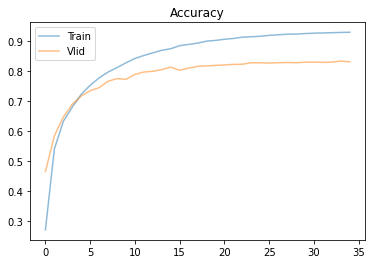

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(train_accuracies, label='Train', alpha=0.5)
plt.plot(valid_accuracies, label='Vlid', alpha=0.5)
plt.title("Accuracy")
plt.legend()

# Run Prediction

In [2]:
from Prediction import Run_pred
image = "/Users/Theologis/Desktop/CAS Lab/sem-supervised_chars74k/dataset/ICDAR 2003/TrialTest Set/char/43/4211.jpg"
#image = "/Users/Theologis/Desktop/CAS Lab/sem-supervised_chars74k/images/tempM1.png
Run_pred(proj_directory,image,real_size=real_size)


INFO:tensorflow:Restoring parameters from ./savedmodel\variables\variables
Output node/s name : discriminator/out:0
Prediction of the first image is : A
P is real is : 0.9975901656834008
Classification time:  0.0007691739797592163


In this step we load the .pb that created in the training and run the prediction for a given image.The Output node/s name is the input in the next step without the ":0".In the next step we must specify the output node of the NN. We are going to create the appropriate files for the DNNDK(frozen_model_dnndk.pd).We also  are going to print  all the notes of the model."Input_real" is the input node and "discriminator/out" in the bottom is the output node.

# Create DNNDK inputs

In [4]:
from Create_DNNDK_files import Create_Frozen_graph
Create_Frozen_graph(output_node_names="discriminator/out")

INFO:tensorflow:Restoring parameters from ./checkpoints\discriminator.ckpt
INFO:tensorflow:Froze 26 variables.
INFO:tensorflow:Converted 26 variables to const ops.
DNNDK graph successfully created
Successfully created the file 'frozen_model_dnndk.pb'.The name of all model's nodes are:
prefix/input_real
prefix/discriminator/dropout/Identity
prefix/discriminator/conv2d/kernel
prefix/discriminator/conv2d/kernel/read
prefix/discriminator/conv2d/bias
prefix/discriminator/conv2d/bias/read
prefix/discriminator/conv2d/Conv2D
prefix/discriminator/conv2d/BiasAdd
prefix/discriminator/conv2d/Relu
prefix/discriminator/dropout_1/Identity
prefix/discriminator/conv2d_1/kernel
prefix/discriminator/conv2d_1/kernel/read
prefix/discriminator/conv2d_1/bias
prefix/discriminator/conv2d_1/bias/read
prefix/discriminator/conv2d_1/Conv2D
prefix/discriminator/conv2d_1/BiasAdd
prefix/discriminator/conv2d_1/Relu
prefix/discriminator/conv2d_2/kernel
prefix/discriminator/conv2d_2/kernel/read
prefix/discriminator/conv

## Run DECENT_Q
We can see below  a script file named **“decen_q.sh”** that can be found in ${dnndk_chars74k}/. Run “sh decent_q.sh” to invoke the DECENT_Q tool to perform quantization with the
appropriate parameters.


In [ ]:
decent_q quantize \
  --input_frozen_graph frozen_model_dnndk.pb \
  --input_nodes input_real \
  --input_shapes ?,32,32,1 \
  --output_nodes discriminator/out \
  --input_fn data_gen.load_data \
  --method 1 \
  --gpu 0 \
  --calib_iter 10 \
  --output_dir ./quantize_results \

# Evaluate dnndk model
After we run the decen_q.sh script dnndk export two .pd files.The quantize_eval_model.pb under the quantize_results folder is the tensorflow model for evaluation.The foler ".../../sem-supervised_chars74k}/test_data/" is where the test images were saved in the training prosses.Copy and paste them in the ${DNNDK_chars74k}/OCR_Zedboard direcory.The script files named "eval.py" is used to perform evaluation for the float and quantized model respectively.Evaluation is applied to the ICDAR 2003 dataset for the correct ptection that the input is char and the correct classification.

In [1]:
proj_directory = '/Users/Theologis/Desktop/CAS Lab/dnndk_chars74k/' ##TOCHANGE... cd in the ${../../dnndk_chars74k}/ dir
%cd $proj_directory

C:\Users\Theologis\Desktop\CAS Lab\dnndk_chars74k


In [3]:
from eval import evaluate_dnndk_model
evaluate_dnndk_model(proj_directory = proj_directory,input_node = "input_real",output_node = "discriminator/out")

11492 data successfully loades with shape :  (32, 32, 1)

Classifier test accuracy 0.75438905
P is real is accuracy: 0.9224894662921348


## Compiling TensorFlow Model
Run The script file, dnnc_Zedboar.sh in $dnndk_chars74k/ to  compile TensorFlow model using DNNC.After the compilation is complite DNNC will generate two files under output_dir folder.Run the model in the DPU as in the user guide.